In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Code to read dataset

In [2]:
df= pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.xls")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.TotalCharges = df.TotalCharges.apply(pd.to_numeric,errors='coerce')
df.TotalCharges.isnull().sum()

11

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the null values has been removed

In [7]:
#Converting the data into numeric classes to remove inconsistency in classifier models
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df["Dependents"] = le.fit_transform(df['Dependents'])
df["PhoneService"] = le.fit_transform(df["PhoneService"])
df["MultipleLines"] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df["InternetService"])
df['OnlineBackup'] = le.fit_transform(df["OnlineBackup"])
df['OnlineSecurity'] = le.fit_transform(df["OnlineSecurity"])
df['DeviceProtection'] = le.fit_transform(df["DeviceProtection"])
df['TechSupport'] = le.fit_transform(df["TechSupport"])
df['StreamingMovies'] = le.fit_transform(df["StreamingMovies"])
df['StreamingTV'] = le.fit_transform(df["StreamingTV"])
df['Contract'] = le.fit_transform(df["Contract"])
df['PaperlessBilling'] = le.fit_transform(df["PaperlessBilling"])
df['PaymentMethod'] = le.fit_transform(df["PaymentMethod"])
df['Churn'] = le.fit_transform(df["Churn"])

In [8]:
df = df.drop(columns=['customerID'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


##  Looking for co-relations to target label

<Axes: >

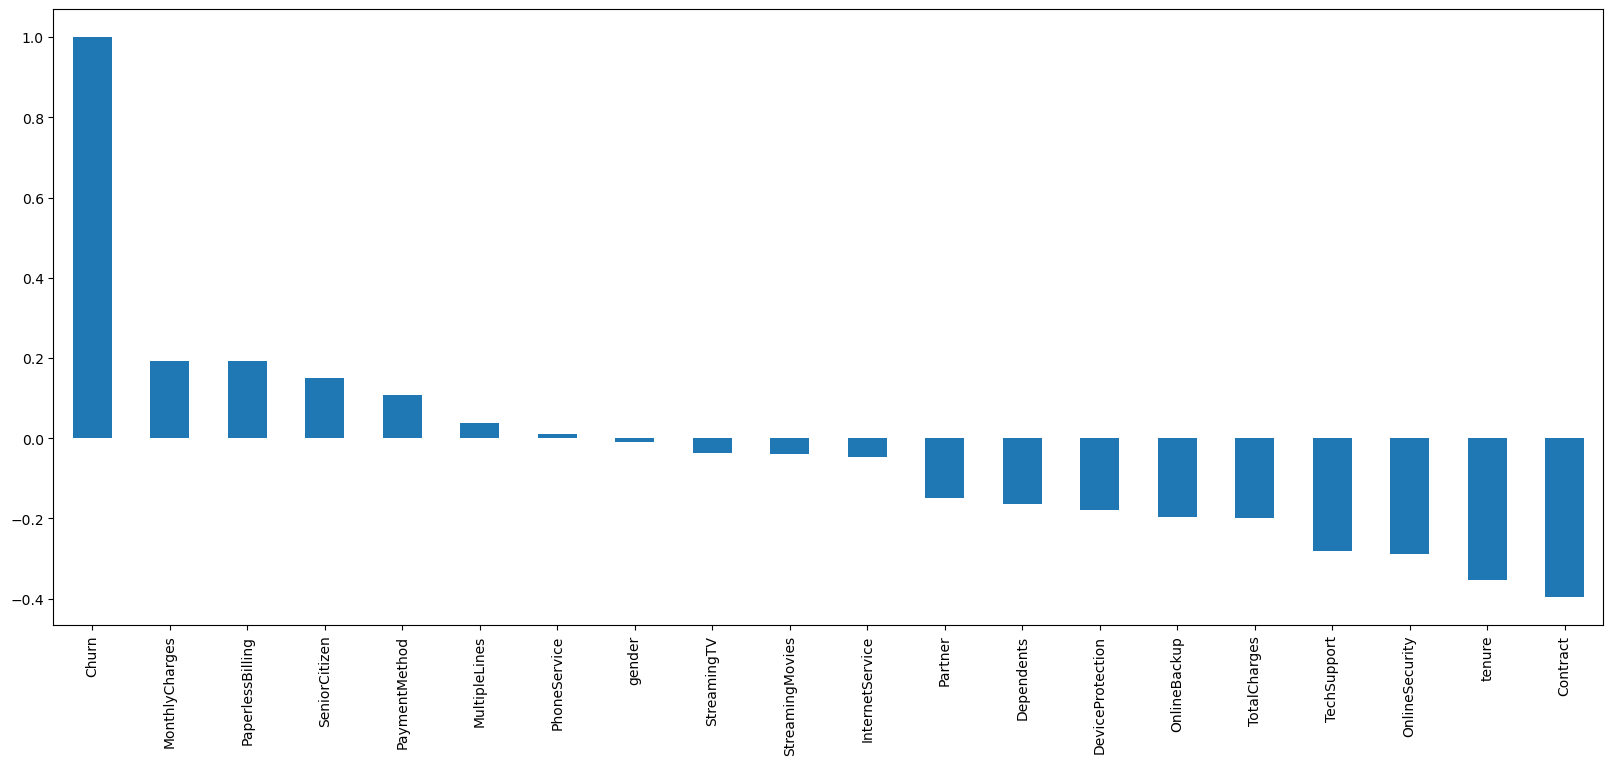

In [9]:
import matplotlib.pyplot as plt
corr_matrix = df.corr()
corr_matrix["Churn"].sort_values(ascending = False)
plt.figure(figsize=(20,8))
corr_matrix["Churn"].sort_values(ascending=False).plot(kind="bar")

## Declaration of labels and features

In [10]:
label = df.drop(["Churn"],axis=1)
label.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [11]:
target = df["Churn"]
target.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [12]:
# For balancing the dataset
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_sample,y_sample = sm.fit_resample(label,target)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_sample,y_sample,test_size=0.2,random_state=6)

In [14]:
# creating dictionary to store results for evaluation metrics
model =dict()
model_name  = list()

## Support Vector Machine

In [15]:
from sklearn.svm import SVC
# kernel = rbf
svc_model = SVC(kernel= 'rbf')
svc_model.fit(x_train,y_train)
print(svc_model.score(x_test,y_test))
svc_predict =  svc_model.predict(x_test)
model_name.append("SVC-RBF")
model["SVC-RBF"] = svc_predict

0.7778723404255319


In [16]:
svc_linear_model = SVC(kernel='linear')
svc_linear_model.fit(x_train,y_train)
svc_linear_predict =  svc_linear_model.predict(x_test)
print(svc_linear_model.score(x_test,y_test)) 
model_name.append("SVC-linear")
model["SVC-linear"] = svc_linear_predict

0.9327659574468085


In [17]:
svc_poly_model = SVC(kernel= 'poly')
svc_poly_model.fit(x_train,y_train)
svc_poly_predict = svc_poly_model.predict(x_test)
print(svc_poly_model.score(x_test,y_test)) 
model_name.append("SVC-poly")
model["SVC-poly"] = svc_poly_predict

0.6314893617021277


In [18]:
svc_sigmoid_model = SVC(kernel = 'sigmoid')
svc_sigmoid_model.fit(x_train,y_train)
svc_sigmoid_predict = svc_sigmoid_model.predict(x_test) 
print(svc_sigmoid_model.score(x_test,y_test)) 
model_name.append("SVC-sigmoid")
model["SVC-sigmoid"] = svc_sigmoid_predict

0.4919148936170213


## K-Nearest Neighbors (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(x_train,y_train)
knn_predict = knn_model.predict(x_test)
print(knn_model.score(x_test,y_test))
model_name.append("KNN")
model["KNN"] = knn_predict

0.9804255319148936


## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)
dtc_predict = dtc_model.predict(x_test)
print(dtc_model.score(x_test,y_test))
model_name.append("Decision Tree Classifier")
model["Decision Tree Classifier"] = dtc_predict

0.9327659574468085


## Multi-Layer Perceptron Classifier (MLPC).

In [21]:
from sklearn.neural_network import MLPClassifier
mlpc_model = MLPClassifier(random_state=1,max_iter=300)
mlpc_model.fit(x_train,y_train)
mlpc_predict = mlpc_model.predict(x_test)
print(mlpc_model.score(x_test,y_test))
model_name.append("Multi Layer Perceptron")
model["Multi Layer Perceptron"] = mlpc_predict

0.9285106382978724


## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
gnb_predict = gnb_model.predict(x_test)
print(gnb_model.score(x_test,y_test))
model_name.append("Naive Bayes")
model["Naive Bayes"] = gnb_predict

0.8893617021276595


In [23]:
model_name

['SVC-RBF',
 'SVC-linear',
 'SVC-poly',
 'SVC-sigmoid',
 'KNN',
 'Decision Tree Classifier',
 'Multi Layer Perceptron',
 'Naive Bayes']

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
eval_me = dict()
accuracy=[]
recall=[]
precision=[]
f1=[]
met=[]
for i in model_name:
    x=[]
    x.append(i)
    x.append(accuracy_score(y_test,model[i]))
    x.append(recall_score(y_test,model[i]))
    x.append(precision_score(y_test,model[i]))
    x.append(f1_score(y_test,model[i]))
    accuracy.append(accuracy_score(y_test,model[i]))
    recall.append(recall_score(y_test,model[i]))
    precision.append(precision_score(y_test,model[i]))
    f1.append(f1_score(y_test,model[i]))
    met.append(x)
eval_me["Name"] = model_name
eval_me["Accuracy"] = accuracy
eval_me["Recall"] = recall
eval_me["Precision"] = precision
eval_me["F1"] = f1

In [25]:
edf = pd.DataFrame(eval_me)
edf.head(len(edf))

,Name,Accuracy,Recall,Precision,F1
0,SVC-RBF,0.777872,0.791602,0.800314,0.795934
1,SVC-linear,0.932766,0.940902,0.936533,0.938712
2,SVC-poly,0.631489,0.947123,0.604167,0.737735
3,SVC-sigmoid,0.491915,0.553655,0.534535,0.543927
4,KNN,0.980426,0.987558,0.976923,0.982212
5,Decision Tree Classifier,0.932766,0.945568,0.932515,0.938996
6,Multi Layer Perceptron,0.928511,0.939347,0.930663,0.934985
7,Naive Bayes,0.889362,0.894246,0.902669,0.898438


In [27]:
metric = eval_me.copy()
del metric['Name']
print(metric.keys())
print(eval_me.keys())

dict_keys(['Accuracy', 'Recall', 'Precision', 'F1'])
dict_keys(['Name', 'Accuracy', 'Recall', 'Precision', 'F1'])


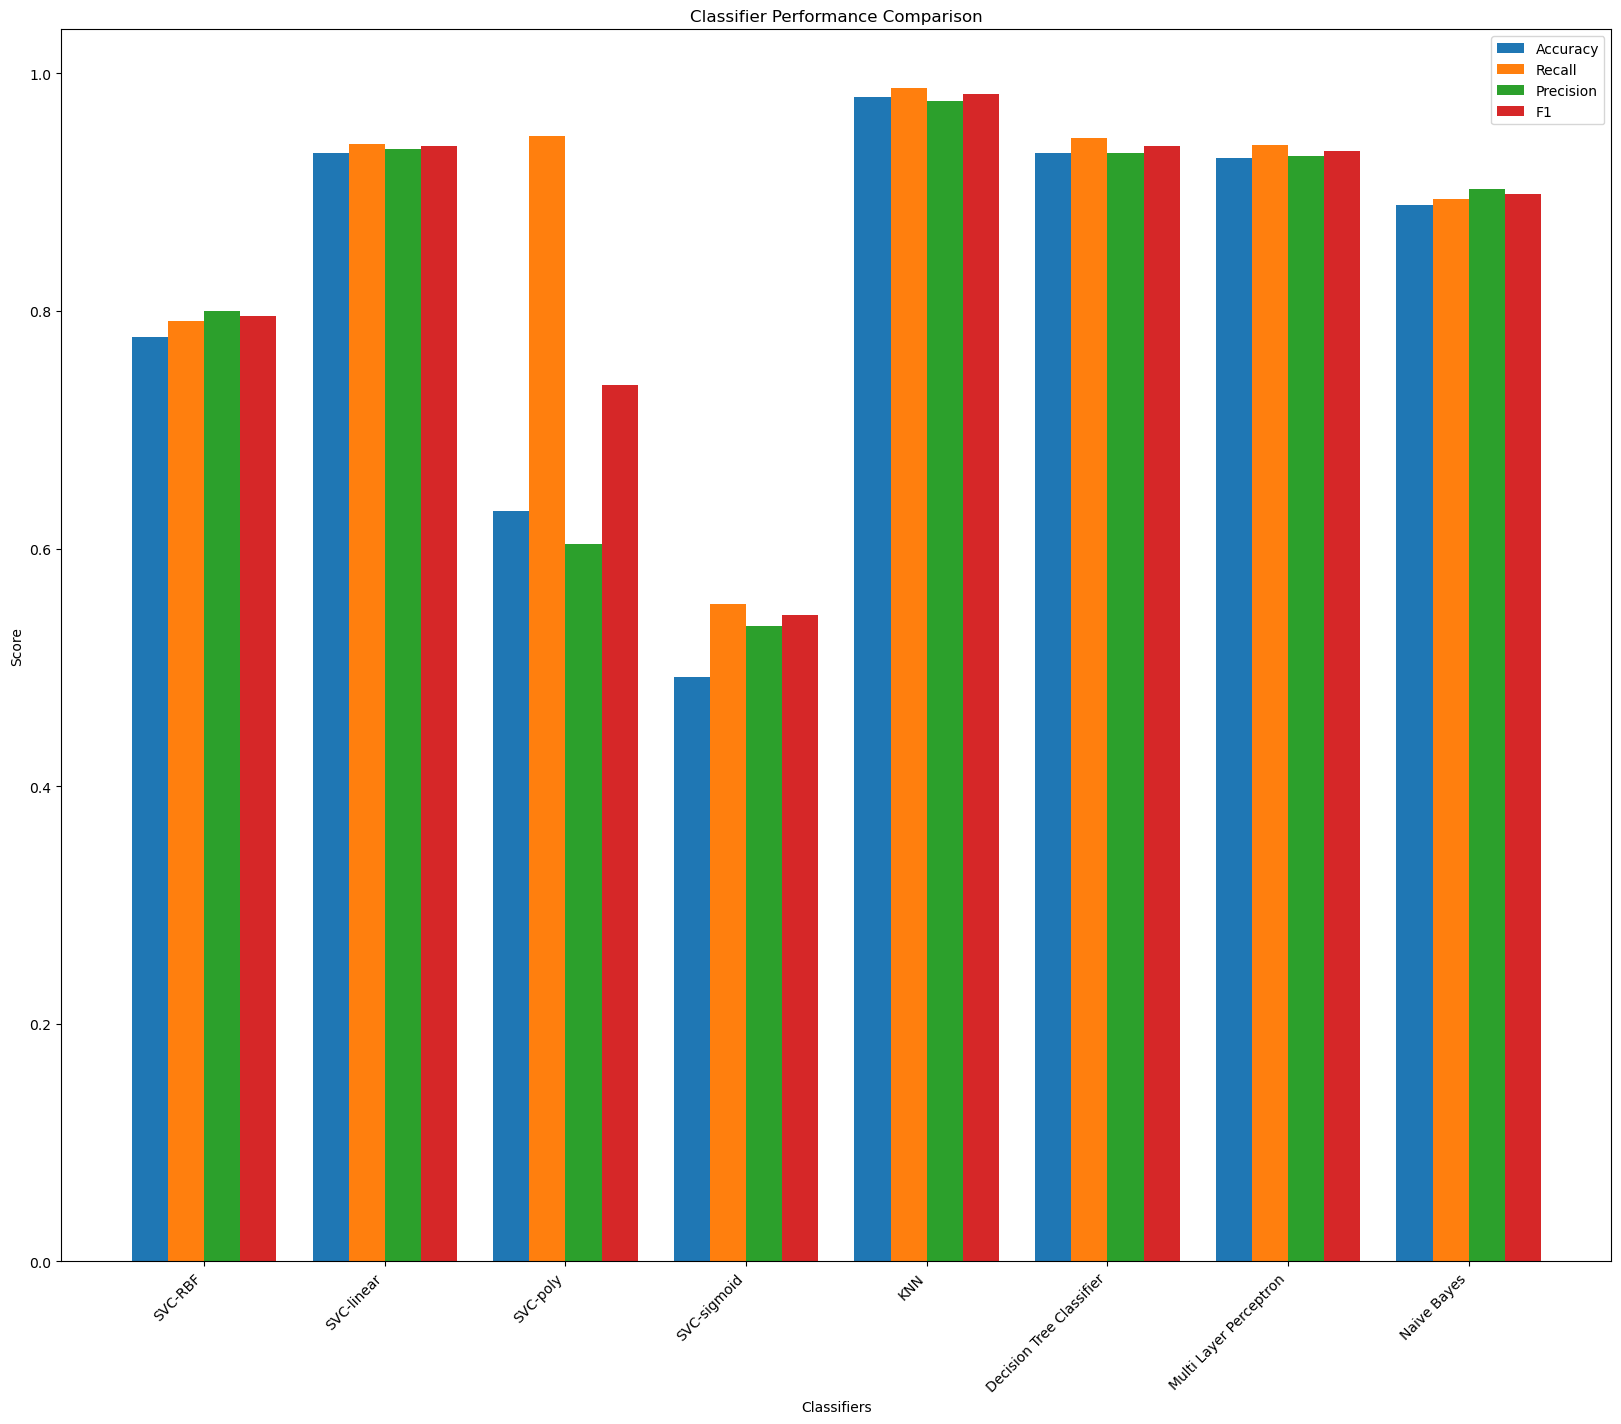

In [31]:
plt.figure(figsize=(20, 16))
bar_width = 0.2
index = np.arange(len(edf))

for i, (metric_name, metric_values) in enumerate(metric.items()):
    plt.bar(index + i * bar_width, metric_values, bar_width, label=metric_name)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Classifier Performance Comparison')
plt.xticks(index + bar_width * (len(metric) - 1) / 2, model_name, rotation=45, ha='right')
plt.legend()
plt.show()